Варіант 31 
Виконав: Стаськів М.А. КН-414

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer

In [ ]:
import copy
import datetime
import random

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [ ]:
path = "/content/drive/MyDrive/MatStat1/lab1/population-past-future.csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
df

,Entity,Code,Year,Population (historical estimates and future projections)
0,Afghanistan,AFG,-10000,14737
1,Afghanistan,AFG,-9000,20405
2,Afghanistan,AFG,-8000,28253
3,Afghanistan,AFG,-7000,39120
4,Afghanistan,AFG,-6000,54166
...,...,...,...,...
74769,Zimbabwe,ZWE,2096,30940779
74770,Zimbabwe,ZWE,2097,30952208
74771,Zimbabwe,ZWE,2098,30959811
74772,Zimbabwe,ZWE,2099,30964052


In [ ]:
labels = ['Ethiopia', 'Ecuador', 'El Salvador', 'Eritrea', 'Equatorial Guinea','Estonia']


In [ ]:
df = df[df['Entity'].isin(labels)]
df = df[(df['Year'] > 1960) & (df['Year'] < 2022)]
df.reset_index(inplace=True)
df

,index,Entity,Code,Year,Population (historical estimates and future projections)
0,19350,Ecuador,ECU,1961,4674176
1,19351,Ecuador,ECU,1962,4809194
2,19352,Ecuador,ECU,1963,4948991
3,19353,Ecuador,ECU,1964,5093848
4,19354,Ecuador,ECU,1965,5243980
...,...,...,...,...,...
361,21772,Ethiopia,ETH,2017,106399926
362,21773,Ethiopia,ETH,2018,109224410
363,21774,Ethiopia,ETH,2019,112078727
364,21775,Ethiopia,ETH,2020,114963583


In [ ]:
day_counties = pd.DataFrame()

day_counties["Date"] = np.nan
day_counties["Name"] = np.nan
day_counties["Population"] = np.nan

In [ ]:
print(day_counties)

dates = pd.date_range(start="1970-01-01", end="2020-01-01", freq="D")
for country in labels:
    for date in dates:
      p1 = df[(df['Entity'] == country) & ((df['Year'] == date.year))]['Population (historical estimates and future projections)']
      p2 = df[(df['Entity'] == country) & ((df['Year'] == date.year+1))][
          'Population (historical estimates and future projections)']
      day_counties.loc[len(day_counties.index)] = [date, country, random.randint(int(p1.values[0]) if int(p1.values[0]) < int(p2.values[0]) else int(p2.values[0]), int(p1.values[0]) if int(p1.values[0]) > int(p2.values[0]) else int(p2.values[0]))]
      print(date, country)
    print(country)

Streaming output truncated to the last 5000 lines.
2006-04-26 00:00:00 Estonia
2006-04-27 00:00:00 Estonia
2006-04-28 00:00:00 Estonia
2006-04-29 00:00:00 Estonia
2006-04-30 00:00:00 Estonia
2006-05-01 00:00:00 Estonia
2006-05-02 00:00:00 Estonia
2006-05-03 00:00:00 Estonia
2006-05-04 00:00:00 Estonia
2006-05-05 00:00:00 Estonia
2006-05-06 00:00:00 Estonia
2006-05-07 00:00:00 Estonia
2006-05-08 00:00:00 Estonia
2006-05-09 00:00:00 Estonia
2006-05-10 00:00:00 Estonia
2006-05-11 00:00:00 Estonia
2006-05-12 00:00:00 Estonia
2006-05-13 00:00:00 Estonia
2006-05-14 00:00:00 Estonia
2006-05-15 00:00:00 Estonia
2006-05-16 00:00:00 Estonia
2006-05-17 00:00:00 Estonia
2006-05-18 00:00:00 Estonia
2006-05-19 00:00:00 Estonia
2006-05-20 00:00:00 Estonia
2006-05-21 00:00:00 Estonia
2006-05-22 00:00:00 Estonia
2006-05-23 00:00:00 Estonia
2006-05-24 00:00:00 Estonia
2006-05-25 00:00:00 Estonia
2006-05-26 00:00:00 Estonia
2006-05-27 00:00:00 Estonia
2006-05-28 00:00:00 Estonia
2006-05-29 00:00:00 Eston

In [ ]:
day_counties.to_csv('/content/drive/MyDrive/MatStat1/lab1/out.csv')  

In [ ]:
day_counties = pd.read_csv('/content/drive/MyDrive/MatStat1/lab1/out.csv')
day_counties.drop(day_counties.filter(regex="Unname"),axis=1, inplace=True)

In [ ]:
day_counties

,Date,Name,Population
0,1970-01-01,Ethiopia,29236883.0
1,1970-01-02,Ethiopia,28682518.0
2,1970-01-03,Ethiopia,29139706.0
3,1970-01-04,Ethiopia,28666053.0
4,1970-01-05,Ethiopia,28930209.0
...,...,...,...
109573,2019-12-28,Estonia,1325854.0
109574,2019-12-29,Estonia,1326130.0
109575,2019-12-30,Estonia,1325953.0
109576,2019-12-31,Estonia,1325982.0


In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
day_counties_filtered = remove_outlier(day_counties,'Population')

In [ ]:
day_counties_filtered

,Date,Name,Population
0,1970-01-01,Ethiopia,29236883.0
1,1970-01-02,Ethiopia,28682518.0
2,1970-01-03,Ethiopia,29139706.0
3,1970-01-04,Ethiopia,28666053.0
4,1970-01-05,Ethiopia,28930209.0
...,...,...,...
109573,2019-12-28,Estonia,1325854.0
109574,2019-12-29,Estonia,1326130.0
109575,2019-12-30,Estonia,1325953.0
109576,2019-12-31,Estonia,1325982.0


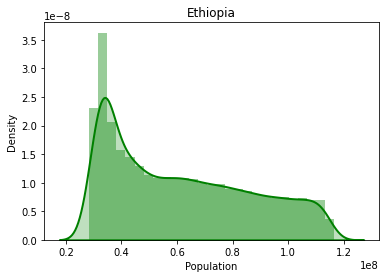

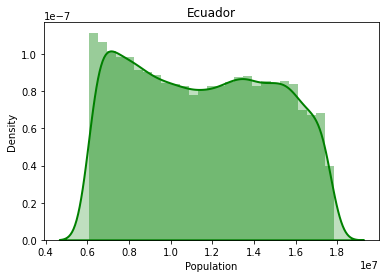

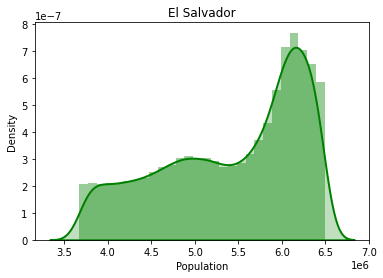

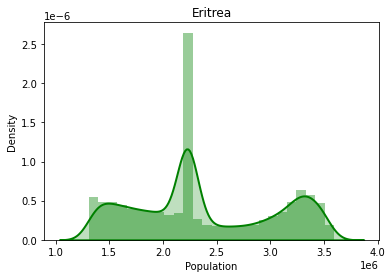

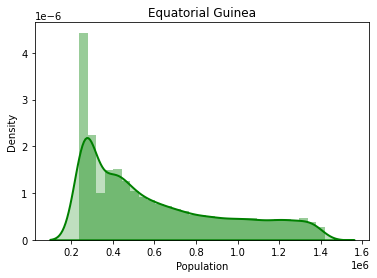

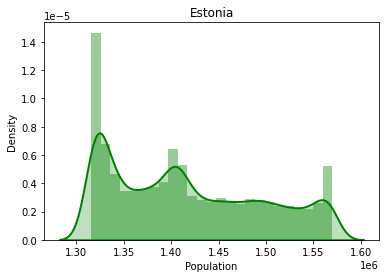

In [ ]:
for label in labels:
  sort_data = day_counties_filtered[day_counties_filtered['Name'] == label]
  
  sns.distplot(sort_data['Population'], hist = True, kde = True,
              kde_kws = {'shade': True, 'linewidth': 2},
              label = "Normal", color ="green").set(title=label)
  plt.show()
  #print(max(sort_data['Population']))

In [ ]:
from  statsmodels.tsa.seasonal import seasonal_decompose
data_data = {}
for i in labels:
  t_data = day_counties[day_counties['Name']==i]["Population"].to_numpy()
  index = dates
  data = pd.Series(t_data, index)
  data_data[i] = data

In [ ]:
data_data['Ecuador']

1970-01-01     6228383.0
1970-01-02     6173134.0
1970-01-03     6110474.0
1970-01-04     6138579.0
1970-01-05     6247094.0
                 ...    
2019-12-28    17546166.0
2019-12-29    17555201.0
2019-12-30    17524115.0
2019-12-31    17631740.0
2020-01-01    17849868.0
Freq: D, Length: 18263, dtype: float64

In [ ]:
for i in labels:
  print('@@@@@@@@@@@@',i,'@@@@@@@@@@@')
  decompose = seasonal_decompose(data_data[i])
  print('trend,trend,trend,trend,trend,trend,trend,trend,trend')
  print(decompose.trend)
  print('seasonal,seasonal,seasonal,seasonal,seasonal,seasonal')
  print(decompose.seasonal)
  print('resid,resid,resid,resid,resid,resid,resid,resid,resid,resid')
  print(decompose.resid)

@@@@@@@@@@@@ Ethiopia @@@@@@@@@@@
trend,trend,trend,trend,trend,trend,trend,trend,trend
1970-01-01             NaN
1970-01-02             NaN
1970-01-03             NaN
1970-01-04    2.885806e+07
1970-01-05    2.885741e+07
                  ...     
2019-12-28    1.138512e+08
2019-12-29    1.141712e+08
2019-12-30             NaN
2019-12-31             NaN
2020-01-01             NaN
Freq: D, Name: trend, Length: 18263, dtype: float64
seasonal,seasonal,seasonal,seasonal,seasonal,seasonal
1970-01-01     3290.556146
1970-01-02   -11154.599967
1970-01-03    11750.643022
1970-01-04     1299.064361
1970-01-05   -18847.740578
                  ...     
2019-12-28    11750.643022
2019-12-29     1299.064361
2019-12-30   -18847.740578
2019-12-31     2510.782537
2020-01-01    11151.294479
Freq: D, Name: seasonal, Length: 18263, dtype: float64
resid,resid,resid,resid,resid,resid,resid,resid,resid,resid
1970-01-01              NaN
1970-01-02              NaN
1970-01-03              NaN
1970-01-04   

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
for i in labels:
  decompose = seasonal_decompose(data_data[i])
  print(adfuller(data_data[i]-np.nan_to_num(decompose.trend)))

(10.364909989826682, 1.0, 26, 18236, {'1%': -3.430708643382639, '5%': -2.8616985069257797, '10%': -2.5668543690522028}, 558768.0063338421)
(7.204909887833348, 1.0, 28, 18234, {'1%': -3.4307086827260513, '5%': -2.861698524313042, '10%': -2.5668543783071662}, 487727.3320228638)
(6.827918027430788, 1.0, 22, 18240, {'1%': -3.4307085647217015, '5%': -2.8616984721626944, '10%': -2.5668543505483656}, 448430.02035500365)
(10.065681303461394, 1.0, 33, 18229, {'1%': -3.4307087811223576, '5%': -2.8616985677978914, '10%': -2.56685440145346}, 430894.12596149574)
(11.083690109376011, 1.0, 41, 18221, {'1%': -3.430708938668787, '5%': -2.8616986374232947, '10%': -2.566854438513955}, 401149.23525086534)
(6.224582723323964, 1.0, 21, 18241, {'1%': -3.4307085450618584, '5%': -2.8616984634743057, '10%': -2.566854345923675}, 390369.5862783659)


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Ethiopia


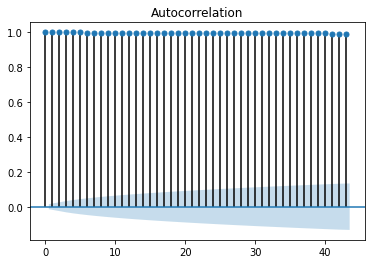

Ecuador


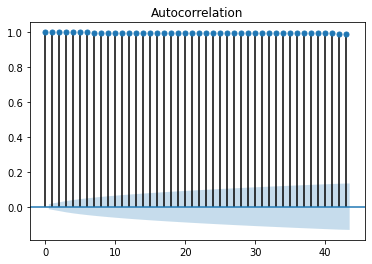

El Salvador


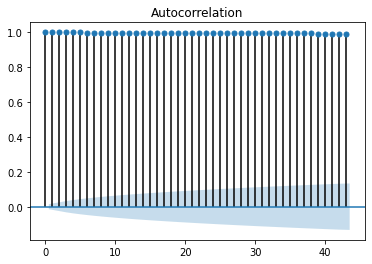

Eritrea


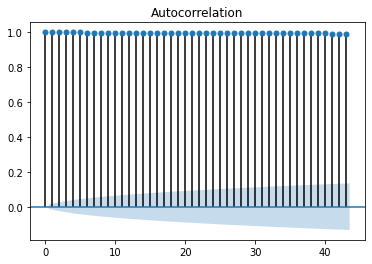

Equatorial Guinea


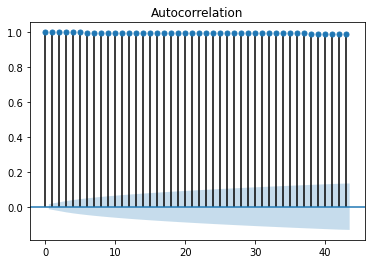

Estonia


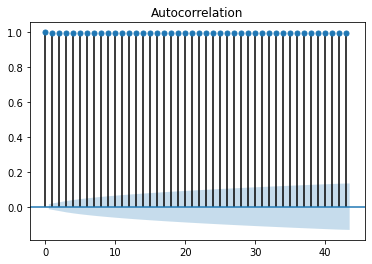

In [ ]:
for i in labels:
  print(i)
  plot_acf(data_data[i])
  plt.show()

Ethiopia


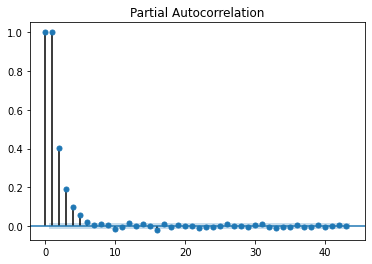

Ecuador


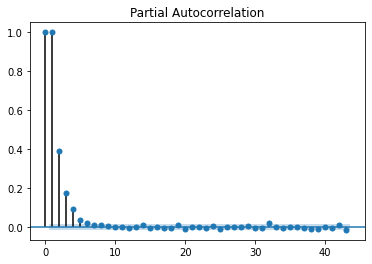

El Salvador


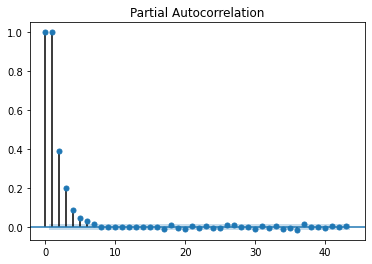

Eritrea


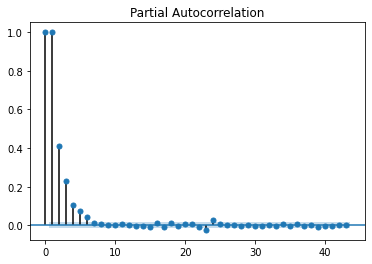

Equatorial Guinea


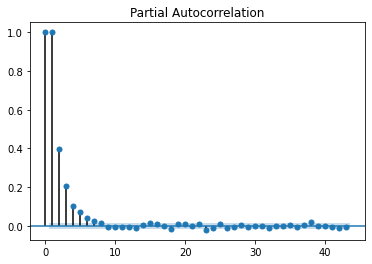

Estonia


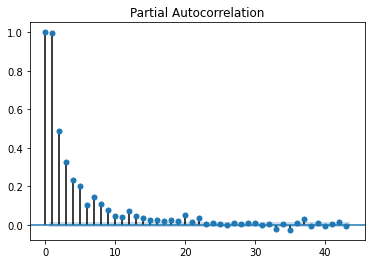

In [ ]:
for i in labels:
  print(i)
  plot_pacf(data_data[i])
  plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


Ethiopia


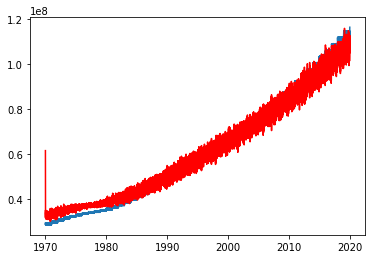

Ecuador


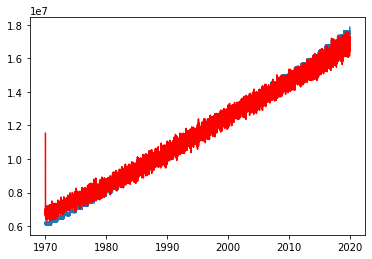

El Salvador


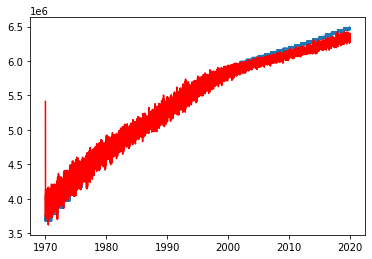

Eritrea


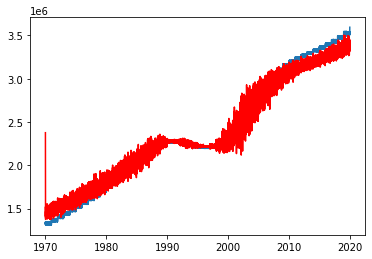

Equatorial Guinea


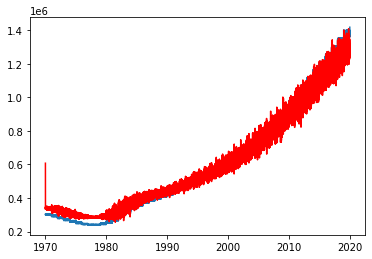

Estonia


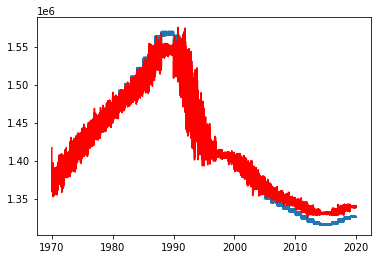

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

for country in labels:
  print(country)
  model = ARIMA(data_data[country], order=(0,0,4))
  results = model.fit()
  plt.plot(data_data[country])
  plt.plot(results.fittedvalues, color='red')
  plt.show()


Ethiopia


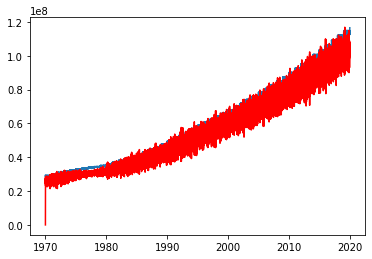

Ecuador


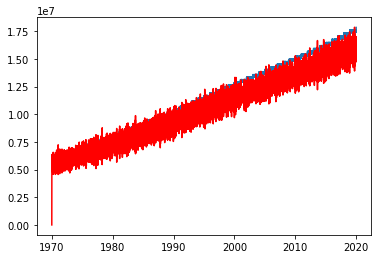

El Salvador


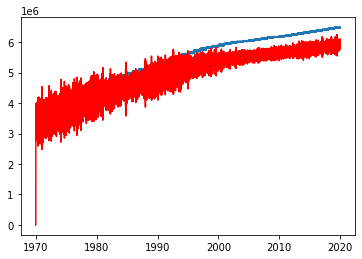

Eritrea


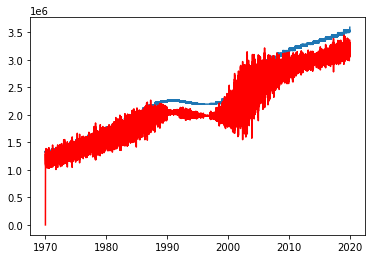

Equatorial Guinea


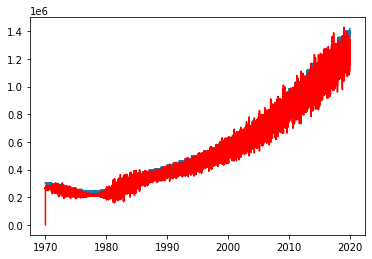

Estonia


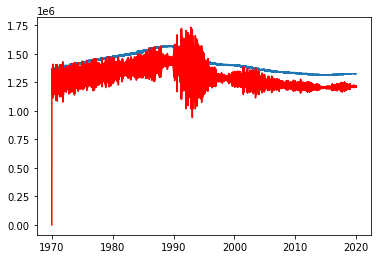

In [ ]:
import statsmodels.api as sm

for country in labels:
  print(country)
  model=sm.tsa.statespace.SARIMAX(data_data[country],order=(0, 0, 4))
  results=model.fit()
  results = model.fit()
  plt.plot(data_data[country])
  plt.plot(results.fittedvalues, color='red')
  plt.show()

Ethiopia


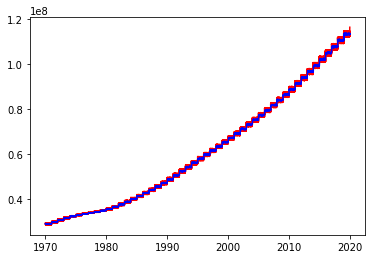

Ecuador


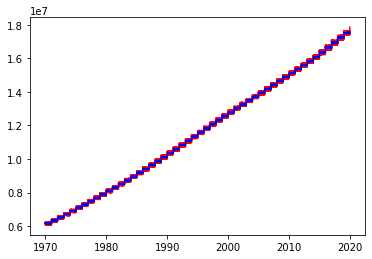

El Salvador


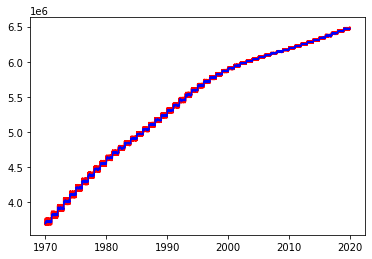

Eritrea


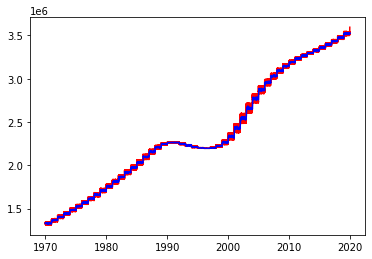

Equatorial Guinea


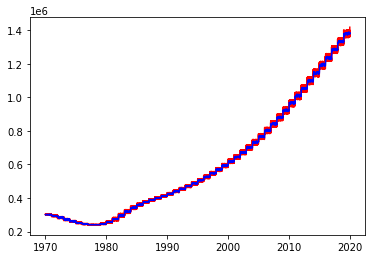

Estonia


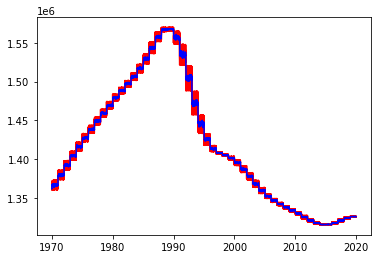

In [ ]:
from matplotlib.pyplot import figure


for country in labels:
  print(country)
  fit1 = SimpleExpSmoothing(data_data[country], initialization_method="heuristic").fit(
      smoothing_level=0.1, optimized=False
  )
  plt.plot(data_data[country], color="red")
  plt.plot(fit1.fittedvalues, color="blue")
  plt.show()

Ethiopia


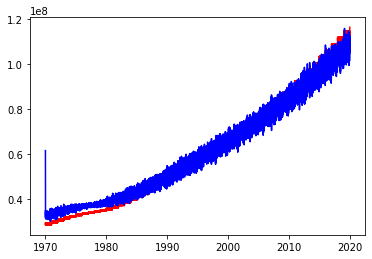

Ecuador


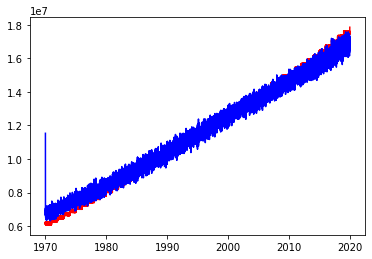

El Salvador


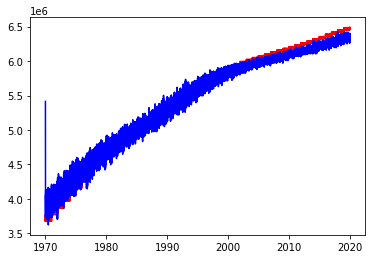

Eritrea


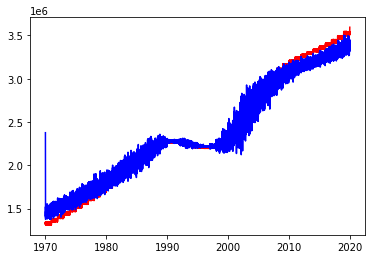

Equatorial Guinea


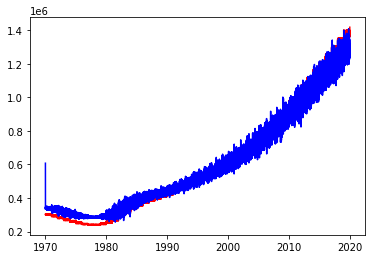

Estonia


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


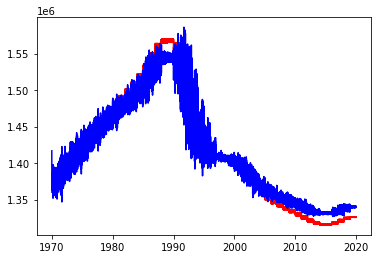

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


for country in labels:
  print(country)
  mod = ARIMA(data_data[country], order=(0,0,4))
  res = mod.fit()

  plt.plot(data_data[country], color="red")
  plt.plot(res.fittedvalues, color="blue")
  plt.show()